# Data Exploration

Use a subset of the debugging data to create visualizations and descriptive statistics of the NYC Citi Bike data. Use these observations to decide how to predice where a bike should be placed.

The debugging dataset is a random subset of NYC Citi Bike data from 2023 (the most recent complete year of data)


## Open Pickled Data

This is from what we extracted and pickled in Milestone 1 (updated to our [data extraction Notebook](https://colab.research.google.com/drive/1BInmWkNqitlIHXVlWWTid3fwA4y96J5j?usp=sharing)). We use a subset of the data (the first 1000 rows) for the data exploration.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pickle
import pandas as pd

# NOTE FOR GRADERS - please add the folder linked below to your drive and alter this string to match the location of the "pickled_data" folder:
# https://drive.google.com/drive/folders/1upZ3Oh242b83WTBUQB4HS64M0BlY2PHE?usp=drive_link
shared_folder_path = f'/content/drive/MyDrive/CS547/CS547 Project Group 11/pickled_data'
save_path = f'{shared_folder_path}/debugging_dataset_2023.pkl'

debugging_df = pd.read_pickle(save_path)
print(debugging_df.shape)

In [ ]:
# Sample Dataset
df = debugging_df.sample(n=1000)
print(df.shape)
print(df.columns)
df.head()

(1000, 15)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_region', 'end_region'],
      dtype='object')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_region,end_region
276861,3B1455DE7D0AA39A,electric_bike,2023-08-19 13:01:03.259,2023-08-19 13:08:38.665,Adam Clayton Powell Blvd & W 151 St,8009.05,Lenox Ave & W 130 St,7753.13,40.825252,-73.936306,40.810792,-73.943068,member,Harlem,Harlem
423392,B999859CAE6B8F97,classic_bike,2023-12-04 19:13:04.649,2023-12-04 19:22:29.923,Sands St Gate,4812.04,Fulton St & Adams St,4637.06,40.699569,-73.979827,40.692418,-73.989495,member,Downtown Brooklyn,Downtown Brooklyn
788376,47657C59F792228B,classic_bike,2023-05-11 18:08:38.194,2023-05-11 18:22:39.114,3 Ave & E 62 St,6762.04,Broadway & W 58 St,6948.10,40.763126,-73.965269,40.766953,-73.981693,member,Upper East Side,Midtown
93394,21D9DE57121BED98,classic_bike,2023-10-22 13:15:11.942,2023-10-22 13:35:54.042,9 Ave & W 39 St,6644.08,E 13 St & 2 Ave,5820.08,40.756404,-73.994101,40.731539,-73.985302,member,Midtown,East Village
586417,D9871344D92FE65C,electric_bike,2023-06-18 17:38:58.367,2023-06-18 17:56:12.882,12 Ave & W 40 St,6765.01,2 Ave & E 29 St,6122.09,40.760929,-74.002787,40.741724,-73.978093,member,Midtown,Midtown


## Data visualizations and summaries

We chose some input features to examine and visualize in comparison to our label, end station region.

Made with the help of ChatGPT and Perplexity.ai

## Comparing start region to end region

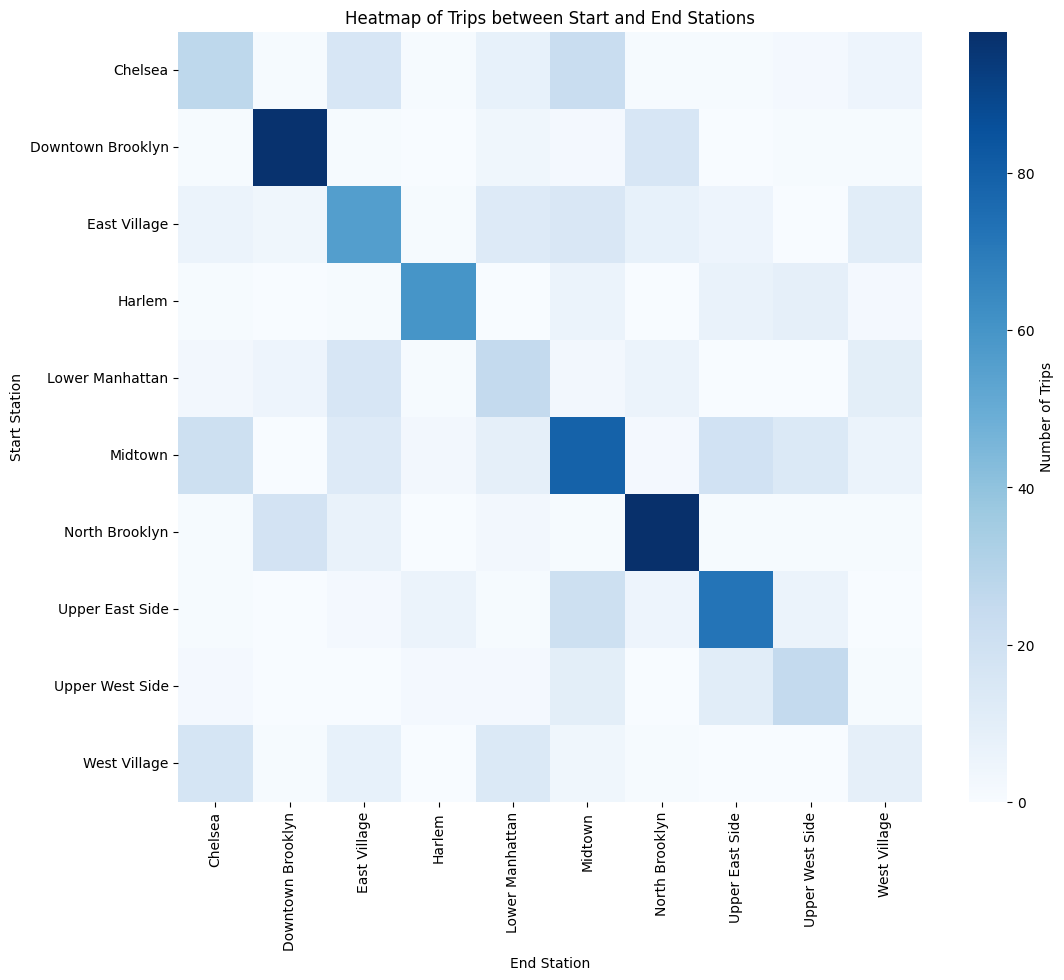

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the counts of each start-end pair
station_pairs = df.pivot_table(index='start_region',
                               columns='end_region',
                               aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(station_pairs, cmap='Blues', cbar_kws={'label': 'Number of Trips'})
plt.title('Heatmap of Trips between Start and End Stations')
plt.xlabel('End Station')
plt.ylabel('Start Station')
plt.show()

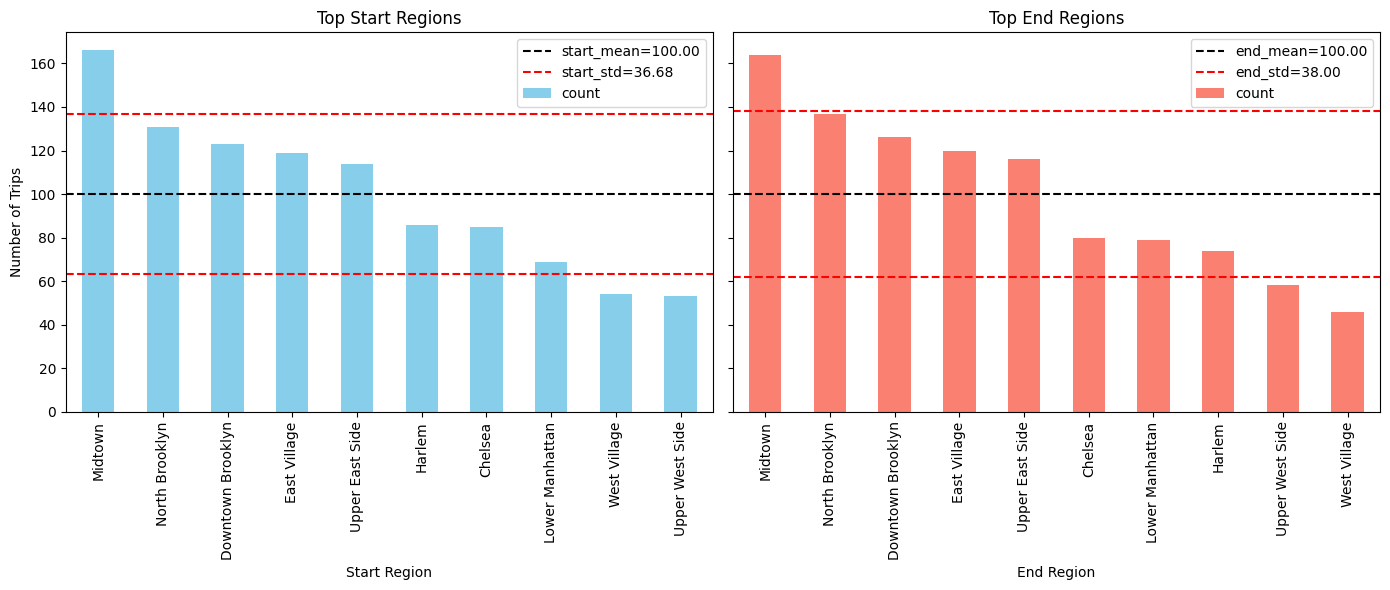

<Figure size 640x480 with 0 Axes>

In [ ]:
# Count trips by start and end regions
start_regions = df['start_region'].value_counts()
end_regions = df['end_region'].value_counts()

# Calculate Central Tendency
start_regions_mean = start_regions.mean()
end_regions_mean = end_regions.mean()

# Calculate Variance
start_regions_std = start_regions.std()
end_regions_std = end_regions.std()

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot start_region chart
start_regions.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top Start Regions')
axes[0].set_xlabel('Start Region')
axes[0].set_ylabel('Number of Trips')
axes[0].axhline(y=start_regions_mean, color='k', linestyle='dashed', label='start_mean={m:.2f}'.format(m=start_regions_mean))
axes[0].axhline(y=start_regions_mean + start_regions_std, color='r', linestyle='dashed', label='start_std={std:.2f}'.format(std=start_regions_std))
axes[0].axhline(y=start_regions_mean - start_regions_std, color='r', linestyle='dashed')
axes[0].legend()

# Plot end_region chart
end_regions.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top End Regions')
axes[1].set_xlabel('End Region')
axes[1].axhline(y=end_regions_mean, color='k', linestyle='dashed', label='end_mean={m:.2f}'.format(m=end_regions_mean))
axes[1].axhline(y=end_regions_mean + end_regions_std, color='r', linestyle='dashed', label='end_std={std:.2f}'.format(std=end_regions_std))
axes[1].axhline(y=end_regions_mean - end_regions_std, color='r', linestyle='dashed')
axes[1].legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Filter to top regions and aggregate counts
regions = pd.concat([df['start_region'], df['end_region']]).value_counts().index
filtered_df = df[df['start_region'].isin(regions) & df['end_region'].isin(regions)]
region_flow = filtered_df.groupby(['start_region', 'end_region']).size().reset_index(name='count')

# Sankey diagram
sources = region_flow['start_region'].astype('category').cat.codes
targets = region_flow['end_region'].astype('category').cat.codes + len(regions)
values = region_flow['count']

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20,
        label=list(regions) + list(regions)
    ),
    link=dict(
        source=sources, target=targets, value=values
    )
))

fig.update_layout(title_text="Region-to-Region Flow of Trips", font_size=10)
fig.show()


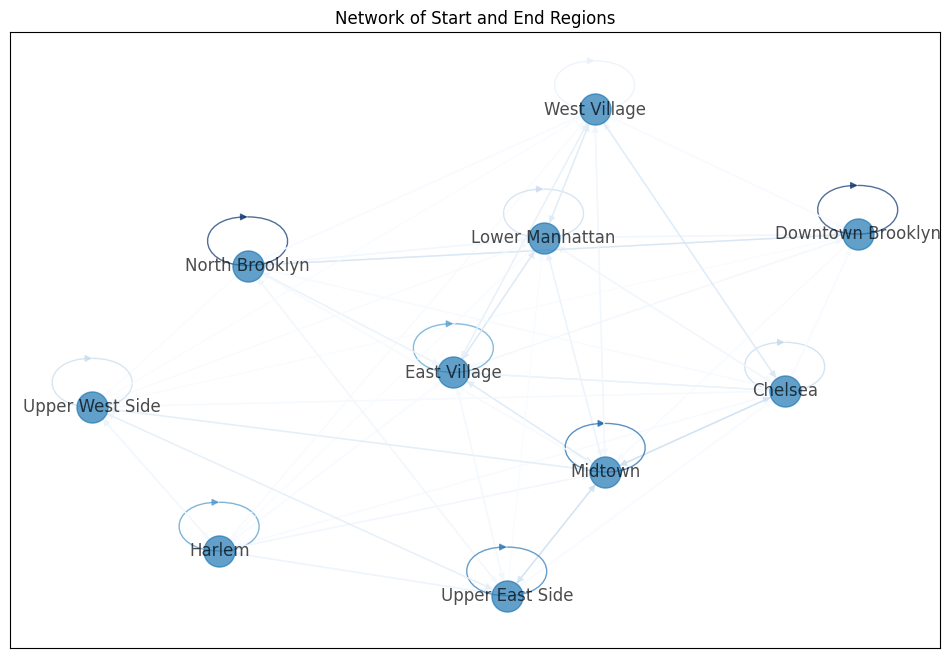

In [ ]:
import networkx as nx

# Aggregate trip counts between each start and end region
region_edges = df.groupby(['start_region', 'end_region']).size().reset_index(name='trips')

# Initialize a directed graph
G = nx.from_pandas_edgelist(region_edges, source='start_region', target='end_region', edge_attr='trips', create_using=nx.DiGraph())

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
edge_weights = [G[u][v]['trips'] / 100 for u, v in G.edges()]  # Scale edge thickness
nx.draw_networkx(G, pos, with_labels=True, node_size=500, edge_color=edge_weights, edge_cmap=plt.cm.Blues, alpha=0.7)
plt.title('Network of Start and End Regions')
plt.show()


## Comparing time of trips

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv("lyft_bike_data.csv")  # Example if data is in a CSV file

# Create new time-based features
df['started_at'] = pd.to_datetime(df['started_at'])
df['hour_of_day'] = df['started_at'].dt.hour
df['day_of_week'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()


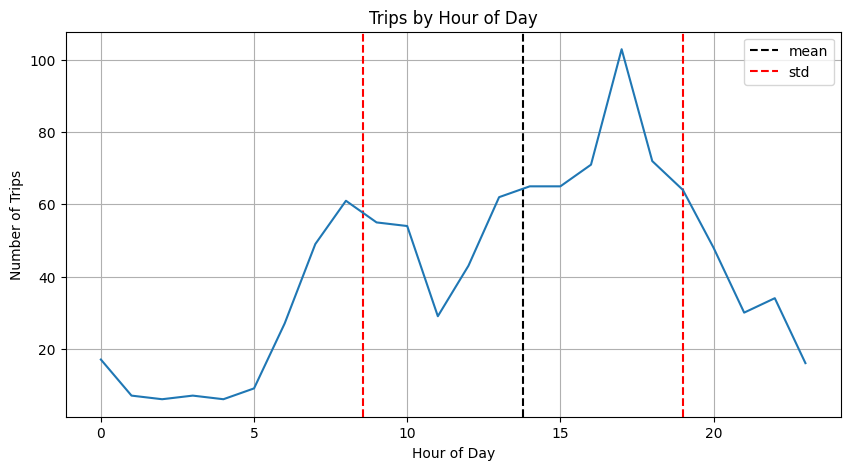

In [ ]:
# Hourly Analysis
hourly_trips = df.groupby('hour_of_day').size()

# Calculated Weighted Mean and Standard Deviation
hourly_trips_mean = df['hour_of_day'].mean()
hourly_trips_std = df['hour_of_day'].std()

# Plot Graph
plt.figure(figsize=(10, 5))
plt.axvline(x=hourly_trips_mean, color='k', linestyle='--', label='mean')
plt.axvline(x=hourly_trips_mean + hourly_trips_std, color='r', linestyle='--', label='std')
plt.axvline(x=hourly_trips_mean - hourly_trips_std, color='r', linestyle='--')
hourly_trips.plot(kind='line')
plt.title("Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.grid()
plt.legend()
plt.show()

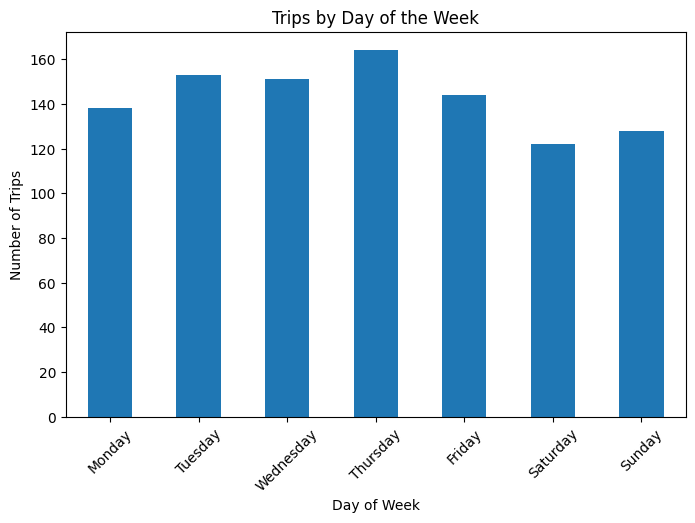

In [ ]:
# Day of Week Analysis
day_of_week_trips = df.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8, 5))
day_of_week_trips.plot(kind='bar')
plt.title("Trips by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

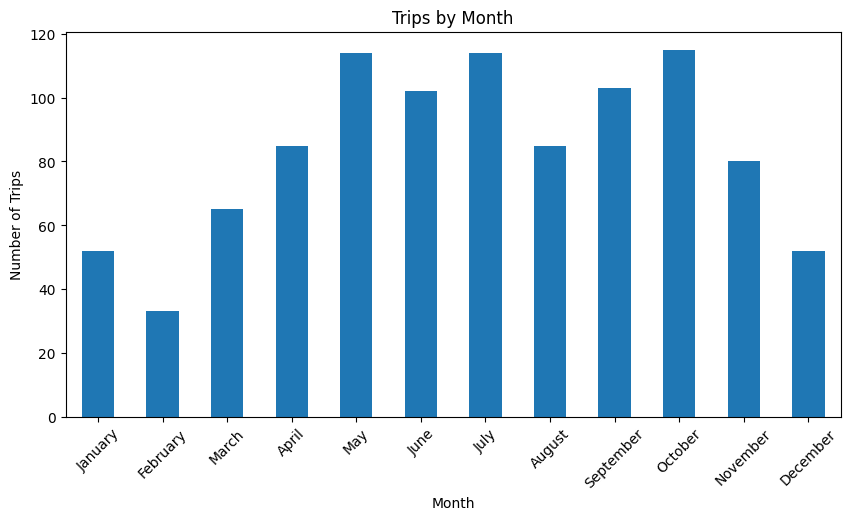

In [ ]:
# Monthly Analysis
monthly_trips = df.groupby('month').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)
plt.figure(figsize=(10, 5))
monthly_trips.plot(kind='bar')
plt.title("Trips by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

## Comparing weather to end region

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the weather data
weather_path = f'{shared_folder_path}/weather_data.csv'
weather_df = pd.read_csv(weather_path)
weather_df['date'] = pd.to_datetime(weather_df['DATE'])  # Ensure date is in datetime format

In [ ]:
display(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_region,end_region
276861,3B1455DE7D0AA39A,electric_bike,2023-08-19 13:01:03.259,2023-08-19 13:08:38.665,Adam Clayton Powell Blvd & W 151 St,8009.05,Lenox Ave & W 130 St,7753.13,40.825252,-73.936306,40.810792,-73.943068,member,Harlem,Harlem
423392,B999859CAE6B8F97,classic_bike,2023-12-04 19:13:04.649,2023-12-04 19:22:29.923,Sands St Gate,4812.04,Fulton St & Adams St,4637.06,40.699569,-73.979827,40.692418,-73.989495,member,Downtown Brooklyn,Downtown Brooklyn
788376,47657C59F792228B,classic_bike,2023-05-11 18:08:38.194,2023-05-11 18:22:39.114,3 Ave & E 62 St,6762.04,Broadway & W 58 St,6948.10,40.763126,-73.965269,40.766953,-73.981693,member,Upper East Side,Midtown
93394,21D9DE57121BED98,classic_bike,2023-10-22 13:15:11.942,2023-10-22 13:35:54.042,9 Ave & W 39 St,6644.08,E 13 St & 2 Ave,5820.08,40.756404,-73.994101,40.731539,-73.985302,member,Midtown,East Village
586417,D9871344D92FE65C,electric_bike,2023-06-18 17:38:58.367,2023-06-18 17:56:12.882,12 Ave & W 40 St,6765.01,2 Ave & E 29 St,6122.09,40.760929,-74.002787,40.741724,-73.978093,member,Midtown,Midtown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521887,B333F0A2212D092B,electric_bike,2023-02-21 18:48:39.801,2023-02-21 18:52:56.961,W 30 St & 8 Ave,6373.07,W 41 St & 8 Ave,6602.03,40.749512,-73.994752,40.756405,-73.990026,member,Chelsea,Midtown
661661,A677068C2A3F1E58,classic_bike,2023-06-10 15:20:32.759,2023-06-10 15:21:48.043,Old Fulton St,4903.08,Old Fulton St,4903.08,40.702772,-73.993836,40.702772,-73.993836,member,Downtown Brooklyn,Downtown Brooklyn
356311,52902268F9E43EEB,electric_bike,2023-08-22 11:16:01.796,2023-08-22 11:26:22.805,McDonald Ave & Vanderbilt St,3394.03,Parkside Ave & Ocean Ave,3448.02,40.651731,-73.981195,40.654850,-73.962170,member,Downtown Brooklyn,Downtown Brooklyn
319547,EC5F726C38DFD43D,classic_bike,2023-08-12 20:44:40.845,2023-08-12 20:56:47.970,W 67 St & Broadway,7116.04,5 Ave & E 72 St,7100.07,40.774925,-73.982666,40.772828,-73.966853,member,Upper West Side,Upper East Side


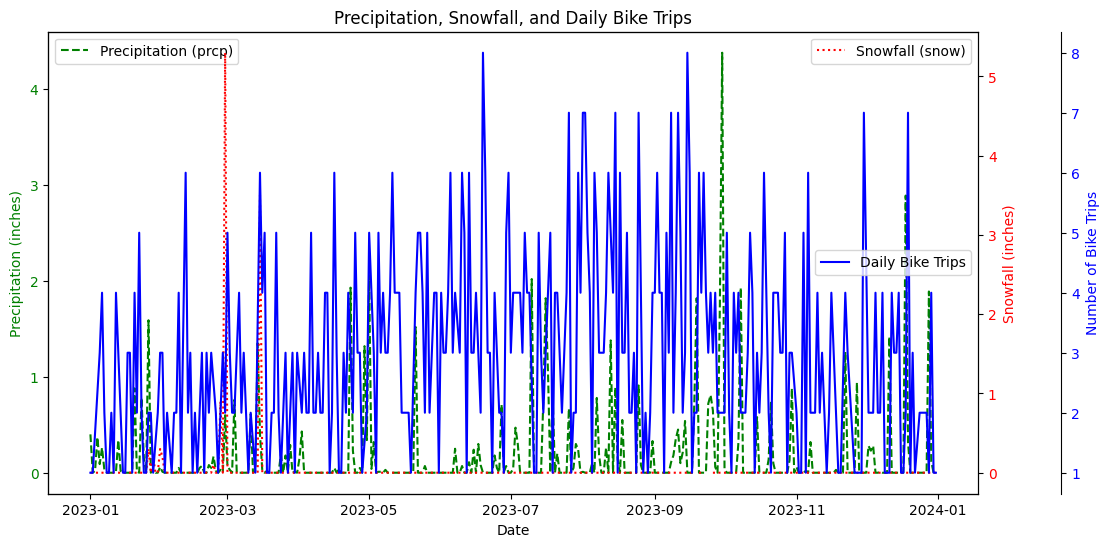

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

daily_bike_trips = df.groupby(df['started_at'].dt.date).size().reset_index(name='trip_count')
daily_bike_trips.rename(columns={'started_at': 'date'}, inplace=True)

# Create a figure and an axes object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot precipitation
ax1.plot(weather_df['date'], weather_df['PRCP'], color='green', linestyle='--', label='Precipitation (prcp)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Precipitation (inches)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc="upper left")

# Create a second axes object that shares the same x-axis as ax1 for snow
ax2 = ax1.twinx()

# Plot snow on the second axes object
ax2.plot(weather_df['date'], weather_df['SNOW'], color='red', linestyle=':', label='Snowfall (snow)')
ax2.set_ylabel("Snowfall (inches)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc="upper right")

# Create a third axes object that shares the same x-axis as ax1 for trip counts
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis spine

# Ensure daily_bike_trips['date'] is in datetime format
daily_bike_trips['date'] = pd.to_datetime(daily_bike_trips['date'])

# Plot trip counts on the third axes object
ax3.plot(daily_bike_trips['date'], daily_bike_trips['trip_count'], color='blue', label='Daily Bike Trips')
ax3.set_ylabel("Number of Bike Trips", color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc="center right")


# Show the plot with a title
plt.title("Precipitation, Snowfall, and Daily Bike Trips")
plt.show()

# Descriptive Statistics

In [ ]:
start_region_distribution = df.groupby('start_region').value_counts(normalize=True)
print(start_region_distribution)

start_region  ride_id           rideable_type  started_at               ended_at                 start_station_name           start_station_id  end_station_name            end_station_id  start_lat  start_lng   end_lat    end_lng     member_casual  end_region         hour_of_day  day_of_week  month    
Chelsea       00622AF037145008  electric_bike  2023-10-31 19:02:59.877  2023-10-31 19:12:12.221  E 20 St & Park Ave           6055.08           E 58 St & 3 Ave             6762.02         40.738260  -73.987535  40.760958  -73.967245  member         Midtown            19           Tuesday      October      0.011765
              0134DAE0FE415C59  electric_bike  2023-07-14 08:43:48.846  2023-07-14 08:50:30.103  W 27 St & 7 Ave              6247.06           W 4 St & 7 Ave S            5880.02         40.746383  -73.994709  40.734011  -74.002939  member         West Village       8            Friday       July         0.011765
              01404A5C3584B2AD  electric_bike  2023-04-02 11:13: